# Account Creation

Looking into if there are large batches of accounts being created at the same time

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates

In [2]:
users1 = pd.read_csv("../data/users1.csv")
users2 = pd.read_csv("../data/users2.csv")
users3 = pd.read_csv("../data/users3.csv")

In [19]:
users = pd.concat([users1, users2, users3])
users.head()

,userid,user_display_name,user_screen_name,user_reported_location,user_profile_description,user_profile_url,follower_count,following_count,account_creation_date,account_language
0,uGlAuK3VrvANhAQAiFOJm1nbrXmFTwtmNRNE1g9Yd6k=,uGlAuK3VrvANhAQAiFOJm1nbrXmFTwtmNRNE1g9Yd6k=,uGlAuK3VrvANhAQAiFOJm1nbrXmFTwtmNRNE1g9Yd6k=,中华人民共和国,🥳,NaN,1,15,2019-01-12,zh-cn
1,+tDWZynsin9nF3PNWStld8JMl7zNLFQP9hnKsFkpngk=,+tDWZynsin9nF3PNWStld8JMl7zNLFQP9hnKsFkpngk=,+tDWZynsin9nF3PNWStld8JMl7zNLFQP9hnKsFkpngk=,NaN,NaN,NaN,21,70,2017-09-27,zh-cn
2,NNPBUwRmLGV+945vErmcyGIc2rCjh+GBdLJWeccGpIo=,NNPBUwRmLGV+945vErmcyGIc2rCjh+GBdLJWeccGpIo=,NNPBUwRmLGV+945vErmcyGIc2rCjh+GBdLJWeccGpIo=,NaN,NaN,NaN,0,9,2017-08-30,zh-cn
3,kdrlgclBJnrkyaVcGHEnDL9R3xIjEWYf8CzaOrpOOjc=,kdrlgclBJnrkyaVcGHEnDL9R3xIjEWYf8CzaOrpOOjc=,kdrlgclBJnrkyaVcGHEnDL9R3xIjEWYf8CzaOrpOOjc=,NaN,NaN,NaN,1,62,2017-08-30,zh-cn
4,14sKta+ATygMbCyCTMAF6sGqsR+FfyuwR4HKPzE05K4=,14sKta+ATygMbCyCTMAF6sGqsR+FfyuwR4HKPzE05K4=,14sKta+ATygMbCyCTMAF6sGqsR+FfyuwR4HKPzE05K4=,NaN,NaN,NaN,4,45,2017-08-30,zh-cn


In [20]:
# drop unnecessary columns
users = users.drop(labels=['follower_count', 'following_count', 'user_profile_url', 'user_reported_location'],
                   axis=1)
users.head()

,userid,user_display_name,user_screen_name,user_profile_description,account_creation_date,account_language
0,uGlAuK3VrvANhAQAiFOJm1nbrXmFTwtmNRNE1g9Yd6k=,uGlAuK3VrvANhAQAiFOJm1nbrXmFTwtmNRNE1g9Yd6k=,uGlAuK3VrvANhAQAiFOJm1nbrXmFTwtmNRNE1g9Yd6k=,🥳,2019-01-12,zh-cn
1,+tDWZynsin9nF3PNWStld8JMl7zNLFQP9hnKsFkpngk=,+tDWZynsin9nF3PNWStld8JMl7zNLFQP9hnKsFkpngk=,+tDWZynsin9nF3PNWStld8JMl7zNLFQP9hnKsFkpngk=,NaN,2017-09-27,zh-cn
2,NNPBUwRmLGV+945vErmcyGIc2rCjh+GBdLJWeccGpIo=,NNPBUwRmLGV+945vErmcyGIc2rCjh+GBdLJWeccGpIo=,NNPBUwRmLGV+945vErmcyGIc2rCjh+GBdLJWeccGpIo=,NaN,2017-08-30,zh-cn
3,kdrlgclBJnrkyaVcGHEnDL9R3xIjEWYf8CzaOrpOOjc=,kdrlgclBJnrkyaVcGHEnDL9R3xIjEWYf8CzaOrpOOjc=,kdrlgclBJnrkyaVcGHEnDL9R3xIjEWYf8CzaOrpOOjc=,NaN,2017-08-30,zh-cn
4,14sKta+ATygMbCyCTMAF6sGqsR+FfyuwR4HKPzE05K4=,14sKta+ATygMbCyCTMAF6sGqsR+FfyuwR4HKPzE05K4=,14sKta+ATygMbCyCTMAF6sGqsR+FfyuwR4HKPzE05K4=,NaN,2017-08-30,zh-cn


In [30]:
#convert to datetime, and then date
users_dt = pd.to_datetime(users.account_creation_date)
users.loc[:,'account_creation_date'] = users_dt.values

In [22]:
account_creation_counts = users.groupby('account_creation_date').count().reset_index()[['account_creation_date', 'userid']]
account_creation_counts.shape

(1359, 2)

In [23]:
dates = matplotlib.dates.date2num(account_creation_counts.account_creation_date)
account_counts = account_creation_counts.userid.values

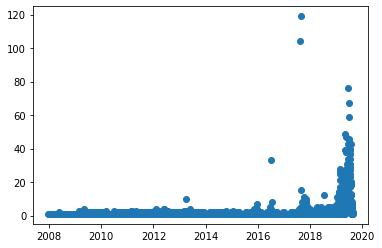

In [9]:
plt.plot_date(dates, account_counts)

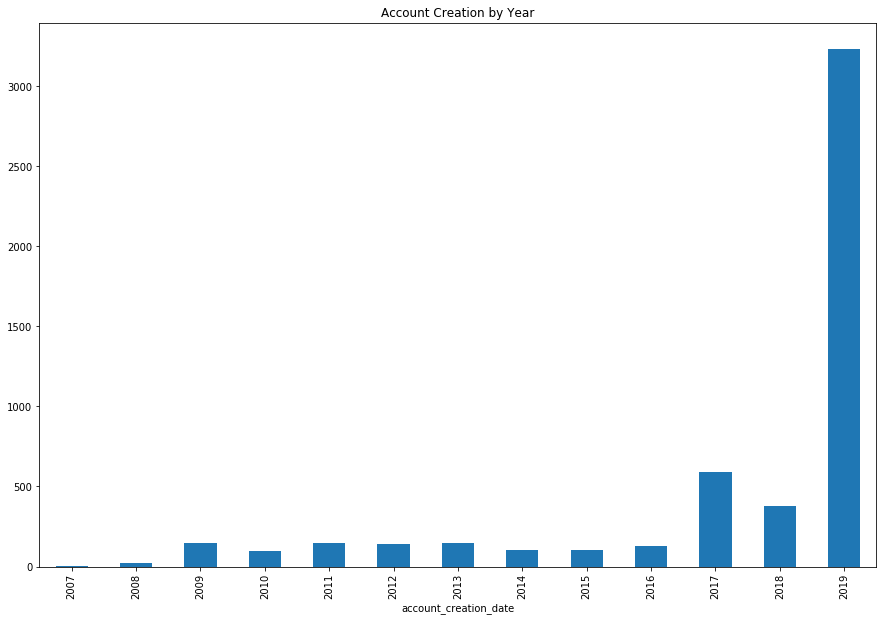

In [38]:
(
    users['account_creation_date']
    .groupby([users["account_creation_date"].dt.year])
    .count()
    .plot(title='Account Creation by Year', figsize=(15,10),kind="bar")
)

In [26]:
users_dt.values

array([datetime.date(2019, 1, 12), datetime.date(2017, 9, 27),
       datetime.date(2017, 8, 30), ..., datetime.date(2019, 5, 31),
       datetime.date(2019, 6, 22), datetime.date(2019, 7, 2)],
      dtype=object)

In [31]:
users["account_creation_date"]

0      2019-01-12
1      2017-09-27
2      2017-08-30
3      2017-08-30
4      2017-08-30
          ...    
4296   2018-06-07
4297   2019-05-23
4298   2019-05-31
4299   2019-06-22
4300   2019-07-02
Name: account_creation_date, Length: 5241, dtype: datetime64[ns]

In [40]:
account_years = users['account_creation_date'].groupby([users["account_creation_date"].dt.year]).count()

In [43]:
account_years.iloc[-1]/account_years.sum()

0.6170578133943904

In [44]:
account_years

account_creation_date
2007       1
2008      25
2009     150
2010     100
2011     144
2012     140
2013     147
2014     101
2015     103
2016     130
2017     589
2018     377
2019    3234
Name: account_creation_date, dtype: int64